**iN metabolomics**

In [1]:
# load data

allcompounds = read.csv('../processed_data/metabolomics_iN/1338.SUB13853_MetabolomicsData_formatted_untargeted.csv', check.names=FALSE)
#allcompounds = read.csv('../processed_data/metabolomics_iN/AllCompounds.csv', sep = "", check.names=FALSE)

allcompounds$grp2 = sign(allcompounds[,'Log2 Fold Change: (H2O, CTRL) / (H2O, ABCA7_LoF)'])*-log10(allcompounds[,'P-value: (H2O, CTRL) / (H2O, ABCA7_LoF)'])
allcompounds$grp1 = sign(allcompounds[,'Log2 Fold Change: (NA, CTRL) / (NA, ABCA7_LoF)'])*-log10(allcompounds[,'P-value: (NA, CTRL) / (NA, ABCA7_LoF)'])
allcompounds$grp3 = -1*sign(allcompounds[,'Log2 Fold Change: (H2O, ABCA7_LoF) / (Choline, ABCA7_LoF)'])*-log10(allcompounds[,'P-value: (H2O, ABCA7_LoF) / (Choline, ABCA7_LoF)'])


Warning message in file(file, "rt"):
"cannot open file '../processed_data/metabolomics_iN/1338.SUB13853_MetabolomicsData_formatted_untargeted.csv': No such file or directory"


ERROR: Error in file(file, "rt"): cannot open the connection


In [2]:
allcompounds = read.csv('../processed_data/metabolomics_iN/AllCompounds.csv', sep = "", check.names=FALSE)
meta = read.csv('../processed_data/metabolomics_iN/meta.csv', header=FALSE)
meta$filename = paste0('Norm. Area: ', meta$V2, '.raw (', meta$V1, ')')
rownames(meta) = meta$filename
meta_temp = meta[meta$V6!='Choline',]
temp = (allcompounds[,startsWith(names(allcompounds), 'Norm. Area')])
temp2 = temp[,meta_temp$filename]

### scatterplot between batches

In [8]:
allcompounds = read.csv('../processed_data/metabolomics_iN/1338.SUB13853_MetabolomicsData_formatted_untargeted.csv', check.names=FALSE)
#allcompounds = read.csv('../processed_data/metabolomics_iN/AllCompounds.csv', sep = "", check.names=FALSE)

allcompounds$grp2 = -1*sign(allcompounds[,'Log2 Fold Change: (H2O, CTRL) / (H2O, ABCA7_LoF)'])*-log10(allcompounds[,'P-value: (H2O, CTRL) / (H2O, ABCA7_LoF)'])
allcompounds$grp1 = -1*sign(allcompounds[,'Log2 Fold Change: (NA, CTRL) / (NA, ABCA7_LoF)'])*-log10(allcompounds[,'P-value: (NA, CTRL) / (NA, ABCA7_LoF)'])
allcompounds$grp3 = -1*sign(allcompounds[,'Log2 Fold Change: (H2O, ABCA7_LoF) / (Choline, ABCA7_LoF)'])*-log10(allcompounds[,'P-value: (H2O, ABCA7_LoF) / (Choline, ABCA7_LoF)'])


In [9]:
# plot scatterplot between batches
library(ggrepel)
sample1 = allcompounds$grp1
sample2 = allcompounds$grp2
df = as.data.frame(cbind(sample1, sample2))
df$Row.names = allcompounds[,'Name']
df$Row.names = ifelse(abs(df$sample1)>1.3 & abs(df$sample2)>1.3, df$Row.names, '')
gene = c('Cer','PC','TG')

options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 100)

p = plot_lipid_diff(df, gene, 'WT vs KO#1 lipid changes by batch', 'Con vs LoF', 'Con vs LoF') #+ xlim(-2.5,5) + ylim(-2.5,5)

pdf('../pdf_figures/metab_batch_corr.pdf', height=7, width=7)
p
dev.off()

Loading required package: ggplot2



png 
  2

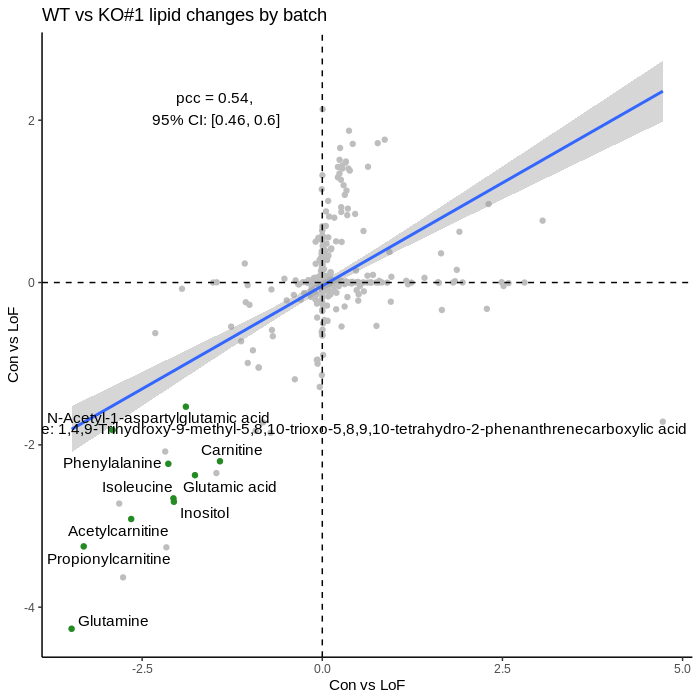

In [10]:
p

In [112]:
library(ggpubr)
library(ggplot2)

#### volcano plots for both batches

In [3]:
library(reshape2)
library(ggrepel)

Loading required package: ggplot2



In [3]:
# names(allcompounds)

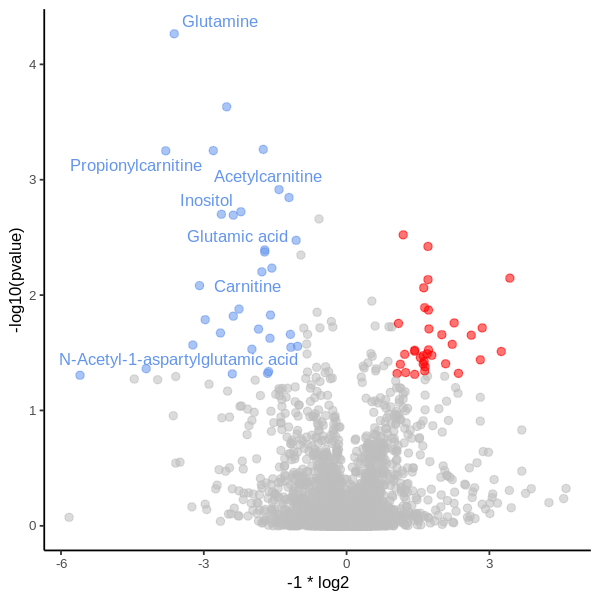

In [509]:
# volcano

allcompounds$log2 = allcompounds[,'Log2 Fold Change: (H2O, CTRL) / (H2O, ABCA7_LoF)']
allcompounds$pvalue = allcompounds[,'P-value: (H2O, CTRL) / (H2O, ABCA7_LoF)']
T = allcompounds$Name[(allcompounds$pvalue<0.05) & (allcompounds$Background=='False') & (allcompounds$Tags%in%c('Level 1 ID', 'Level 2 ID', 'MasslistRT ID'))]
allcompounds$label = ifelse(allcompounds$Name%in%T & allcompounds$pvalue<0.05, allcompounds$Name, '')

lfc_cut =1
pval_cut = 0.05
temp = allcompounds
temp$direction = ifelse(temp$log2>lfc_cut & temp$pvalue<pval_cut, 'up', ifelse(temp$log2< -1*lfc_cut & temp$pvalue<pval_cut, 'down', 'other'))
#temp$label2 = ifelse(temp$direction!='other' & temp$label%in%lab, temp$label,'')
cols = c('red', 'grey', 'cornflowerblue')

options(repr.plot.width=5, repr.plot.height=5)

ggplot(temp, aes(x=-1*log2, y= -log10(pvalue), col=direction, label = label))+ geom_text_repel(max.overlaps = Inf, size = 3.5)+  scale_color_manual(values = cols) + geom_point(aes(alpha = 0.01), size = 2, show.legend = FALSE)+theme_classic() +   theme(text = element_text(size=10),strip.background = element_blank(),strip.placement = "outside" ,strip.text.y = element_text(size = 10, color = "black"))+ theme(legend.position='none')#+ #facet_wrap(~label, ncol = 7, scales = "free_x")


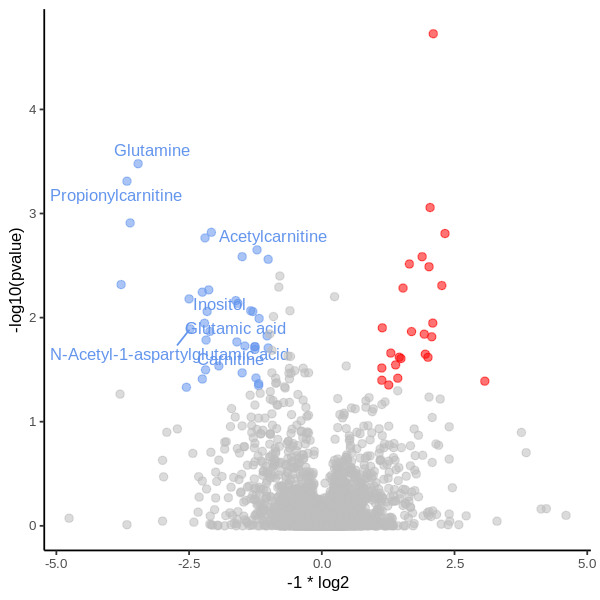

In [510]:
# volcano

allcompounds$log2 = allcompounds[,'Log2 Fold Change: (NA, CTRL) / (NA, ABCA7_LoF)']
allcompounds$pvalue = allcompounds[,'P-value: (NA, CTRL) / (NA, ABCA7_LoF)']
T = allcompounds$Name[(allcompounds$pvalue<0.05) & (allcompounds$Background=='False') & (allcompounds$Tags%in%c('Level 1 ID', 'Level 2 ID', 'MasslistRT ID'))]
allcompounds$label = ifelse(allcompounds$Name%in%T & allcompounds$pvalue<0.05, allcompounds$Name, '')

lfc_cut = 1
pval_cut = 0.05
temp = allcompounds
temp$direction = ifelse(temp$log2>lfc_cut & temp$pvalue<pval_cut, 'up', ifelse(temp$log2< -1*lfc_cut & temp$pvalue<pval_cut, 'down', 'other'))
#temp$label2 = ifelse(temp$direction!='other' & temp$label%in%lab, temp$label,'')
cols = c('red', 'grey', 'cornflowerblue')

options(repr.plot.width=5, repr.plot.height=5)

ggplot(temp, aes(x=-1*log2, y= -log10(pvalue), col=direction, label = label))+ geom_text_repel(max.overlaps = Inf, size = 3.5)+  scale_color_manual(values = cols) + geom_point(aes(alpha = 0.01), size = 2, show.legend = FALSE)+theme_classic() +   theme(text = element_text(size=10),strip.background = element_blank(),strip.placement = "outside" ,strip.text.y = element_text(size = 10, color = "black"))+ theme(legend.position='none')#+ #facet_wrap(~label, ncol = 7, scales = "free_x")


In [307]:
allcompounds = read.csv('../processed_data/metabolomics_iN/AllCompounds.csv', sep = "", check.names=FALSE)

meta = read.csv('../processed_data/metabolomics_iN/meta.csv', header=FALSE)
meta$filename = paste0('Norm. Area: ', meta$V2, '.raw (', meta$V1, ')')
rownames(meta) = meta$filename

In [308]:
temp = allcompounds[,startsWith(names(allcompounds), 'Norm. Area')]
con =  row.names(meta)[meta$V5=='Control']
lof = row.names(meta)[(meta$V6!='Choline') & (meta$V5=='ABCA7 LoF')]

In [309]:
results <- apply(temp, 1, function(i) {
  t.test(i[con], i[lof])$p.value
})

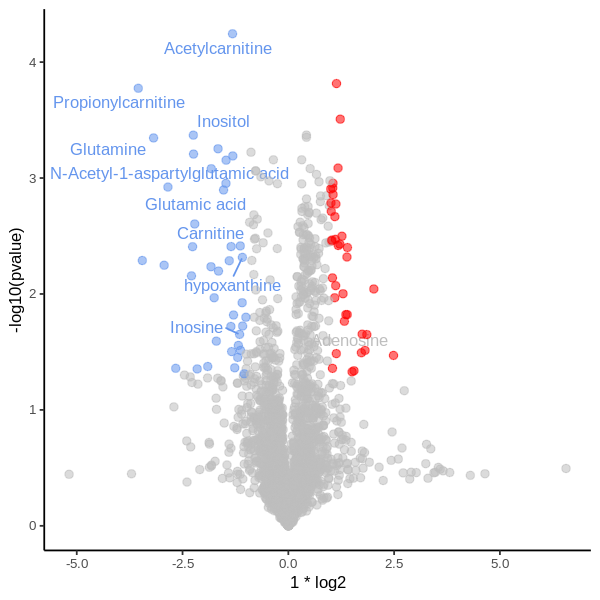

In [310]:
allcompounds$log2 = log2(rowMeans(temp[,lof])/rowMeans(temp[,con]))
allcompounds$pvalue = results
T = allcompounds$Name[(allcompounds$pvalue<0.05) & (allcompounds$Background=='False') & (allcompounds$Tags%in%c('Level 1 ID', 'Level 2 ID', 'MasslistRT ID'))]
allcompounds$label = ifelse(allcompounds$Name%in%T & allcompounds$pvalue<0.05, allcompounds$Name, '')

lfc_cut = 1
pval_cut = 0.05
temp = allcompounds
temp$direction = ifelse(temp$log2>lfc_cut & temp$pvalue<pval_cut, 'up', ifelse(temp$log2< -1*lfc_cut & temp$pvalue<pval_cut, 'down', 'other'))
#temp$label2 = ifelse(temp$direction!='other' & temp$label%in%lab, temp$label,'')
cols = c('cornflowerblue', 'grey', 'red')

options(repr.plot.width=5, repr.plot.height=5)

ggplot(temp, aes(x=1*log2, y= -log10(pvalue), col=direction, label = label))+ geom_text_repel(max.overlaps = Inf, size = 3.5)+  scale_color_manual(values = cols) + geom_point(aes(alpha = 0.01), size = 2, show.legend = FALSE)+theme_classic() +   theme(text = element_text(size=10),strip.background = element_blank(),strip.placement = "outside" ,strip.text.y = element_text(size = 10, color = "black"))+ theme(legend.position='none')#+ #facet_wrap(~label, ncol = 7, scales = "free_x")


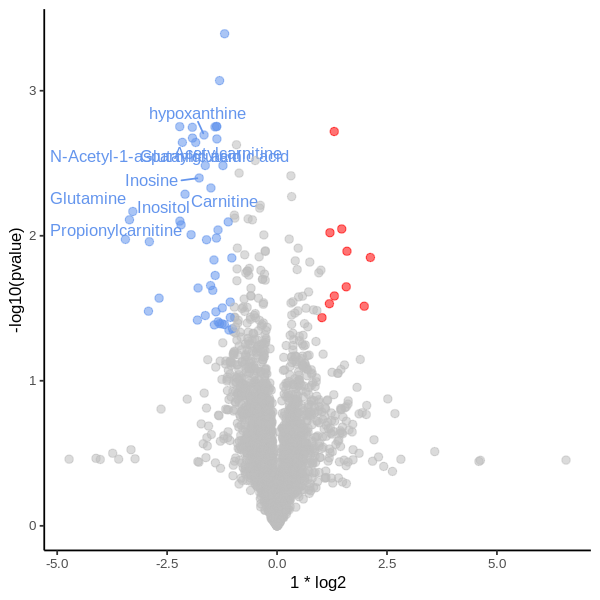

In [7]:
allcompounds$log2 = log2(rowMeans(temp[,lof])/rowMeans(temp[,con]))
allcompounds$pvalue = results
T = allcompounds$Name[(allcompounds$pvalue<0.05) & (allcompounds$Background=='False') & (allcompounds$Tags%in%c('Level 1 ID', 'Level 2 ID', 'MasslistRT ID'))]
allcompounds$label = ifelse(allcompounds$Name%in%T & allcompounds$pvalue<0.05, allcompounds$Name, '')

lfc_cut = 1
pval_cut = 0.05
temp = allcompounds
temp$direction = ifelse(temp$log2>lfc_cut & temp$pvalue<pval_cut, 'up', ifelse(temp$log2< -1*lfc_cut & temp$pvalue<pval_cut, 'down', 'other'))
#temp$label2 = ifelse(temp$direction!='other' & temp$label%in%lab, temp$label,'')
cols = c('cornflowerblue', 'grey', 'red')

options(repr.plot.width=5, repr.plot.height=5)

ggplot(temp, aes(x=1*log2, y= -log10(pvalue), col=direction, label = label))+ geom_text_repel(max.overlaps = Inf, size = 3.5)+  scale_color_manual(values = cols) + geom_point(aes(alpha = 0.01), size = 2, show.legend = FALSE)+theme_classic() +   theme(text = element_text(size=10),strip.background = element_blank(),strip.placement = "outside" ,strip.text.y = element_text(size = 10, color = "black"))+ theme(legend.position='none')#+ #facet_wrap(~label, ncol = 7, scales = "free_x")


In [8]:
table(temp$direction)


 down other    up 
   49  2998    10 

In [3]:
#colnames(temp)

In [12]:
write.csv(temp, '../supplementary_tables/data_metab.csv')

In [554]:
options(repr.plot.width=8, repr.plot.height=6)
p = ggplot(temp, aes(x=1*log2, y= -log10(pvalue), col=direction, label = label))+ geom_text_repel(max.overlaps = Inf, size = 5, box.padding = 1, point.padding = 0.5, force = 1)+  scale_color_manual(values = cols) + geom_point(aes(alpha = 0.01), size = 4, show.legend = FALSE)+theme_classic() +   theme(text = element_text(size=12),strip.background = element_blank(),strip.placement = "outside" ,strip.text.y = element_text(size = 10, color = "black"))+ theme(legend.position='none') + xlim(c(-5,5))#+ #facet_wrap(~label, ncol = 7, scales = "free_x")  + 

In [556]:
pdf('../pdf_figures/meta_volcano.pdf', width=8, height=6)
p
dev.off()

Warning message:
“Removed 1 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


png 
  2

### power analysis for Y622 metabolomics based on G2

In [275]:
library(effsize)
library(pwr)

allcompounds = read.csv('../processed_data/metabolomics_iN/AllCompounds.csv', sep = "", check.names=FALSE)

meta = read.csv('../processed_data/metabolomics_iN/meta.csv', header=FALSE)
meta$filename = paste0('Norm. Area: ', meta$V2, '.raw (', meta$V1, ')')
rownames(meta) = meta$filename

temp = allcompounds[,startsWith(names(allcompounds), 'Norm. Area')]
con =  row.names(meta)[(meta$V6!='Choline') & (meta$V5=='ABCA7 LoF')]
lof = row.names(meta)[(meta$V6=='Choline') & (meta$V5=='ABCA7 LoF')]
names = (allcompounds$Background=='False') & (allcompounds$Tags%in%c('Level 1 ID', 'Level 2 ID', 'MasslistRT ID')) & (allcompounds$Name=='Carnitine')

no_treat_carnitine = unname(unlist(temp[names,con]))
treat_carnitine = unname(unlist(temp[names,lof]))

s = cohen.d(no_treat_carnitine, treat_carnitine)

calculate_power_unbalanced <- function(n1, n2, effect_size, alpha) {
  # Load the pwr package
  library(pwr)
  
  result <- pwr.t2n.test(n1 = n1, n2 = n2, d = effect_size, sig.level = alpha)

  # Return the power
  return(result$power)
}

# Example usage
n1 <- 8        # Sample size for group 1
n2 <- 4        # Sample size for group 2
effect_size <- s$estimate  # Medium effect size (Cohen's d)
alpha <- 0.05   # Significance level

power <- calculate_power_unbalanced(n1, n2, effect_size, alpha)
print(paste("Power:", power))


[1] "Power: 0.469273516952476"


In [278]:
library(effsize)
library(pwr)

allcompounds = read.csv('../processed_data/metabolomics_iN/AllCompounds.csv', sep = "", check.names=FALSE)

meta = read.csv('../processed_data/metabolomics_iN/meta.csv', header=FALSE)
meta$filename = paste0('Norm. Area: ', meta$V2, '.raw (', meta$V1, ')')
rownames(meta) = meta$filename

temp = allcompounds[,startsWith(names(allcompounds), 'Norm. Area')]
con =  row.names(meta)[(meta$V6!='Choline') & (meta$V5=='Control')]
lof = row.names(meta)[(meta$V6!='Choline') & (meta$V5=='ABCA7 LoF')]
names = (allcompounds$Background=='False') & (allcompounds$Tags%in%c('Level 1 ID', 'Level 2 ID', 'MasslistRT ID')) & (allcompounds$Name=='Carnitine')

no_treat_carnitine = unname(unlist(temp[names,con]))
treat_carnitine = unname(unlist(temp[names,lof]))

s = cohen.d(no_treat_carnitine, treat_carnitine)

calculate_power_unbalanced <- function(n1, n2, effect_size, alpha) {
  # Load the pwr package
  library(pwr)
  
  result <- pwr.t2n.test(n1 = n1, n2 = n2, d = effect_size, sig.level = alpha)

  # Return the power
  return(result$power)
}

# Example usage
n1 <- 4        # Sample size for group 1
n2 <- 4        # Sample size for group 2
effect_size <- s$estimate  # Medium effect size (Cohen's d)
alpha <- 0.05   # Significance level

power <- calculate_power_unbalanced(n1, n2, effect_size, alpha)
print(paste("Power:", power))


[1] "Power: 0.873096701079187"


In [290]:
names = (allcompounds$Background=='False') & (allcompounds$Tags%in%c('Level 1 ID', 'Level 2 ID', 'MasslistRT ID')) 

x = as.data.frame(t(temp)[,names])
colnames(x) = allcompounds$Name[names]

In [302]:
T = merge(x[,colnames(x)!='hypoxanthine'], meta, by = 0)
head(T)

,Row.names,Propionylcarnitine,Adenosine,Glutamine,Uridine,N-Acetyl-1-aspartylglutamic acid,Acetylcarnitine,Methamphetamine tert-butyl carbamate,Inositol,Glutamic acid,⋯,Carnitine,V1,V2,V3,V4,V5,V6,V7,V8,filename
,<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,Norm. Area: SUB13853p4_SPL01.raw (F3),5592370.1,3710761,20652404,158849.7,477417.47,15408885,948760.5,2594736.7,6606476,⋯,15848211,F3,SUB13853p4_SPL01,1A,1,Control,N/A,395200,22,Norm. Area: SUB13853p4_SPL01.raw (F3)
2,Norm. Area: SUB13853p4_SPL02.raw (F4),4762824.3,3153956,10477160,169262.9,291510.85,16588708,703089.9,1536217.4,4932140,⋯,12609246,F4,SUB13853p4_SPL02,2B,1,Control,N/A,395200,22,Norm. Area: SUB13853p4_SPL02.raw (F4)
3,Norm. Area: SUB13853p4_SPL03.raw (F5),6592255.4,2997697,20764917,145745.0,474241.54,17665773,783013.2,2306721.8,7346512,⋯,18999530,F5,SUB13853p4_SPL03,3C,1,Control,N/A,395200,22,Norm. Area: SUB13853p4_SPL03.raw (F5)
4,Norm. Area: SUB13853p4_SPL04.raw (F6),180632.1,3511055,1880652,176373.3,66634.76,5636184,879148.4,516645.4,1633743,⋯,5876561,F6,SUB13853p4_SPL04,4D,1,ABCA7 LoF,N/A,424000,24,Norm. Area: SUB13853p4_SPL04.raw (F6)
5,Norm. Area: SUB13853p4_SPL05.raw (F7),440729.5,5337853,1847026,227978.5,85230.56,7105797,2026681.5,404904.8,2185391,⋯,9235525,F7,SUB13853p4_SPL05,5E,1,ABCA7 LoF,N/A,434000,24,Norm. Area: SUB13853p4_SPL05.raw (F7)
6,Norm. Area: SUB13853p4_SPL06.raw (F8),877965.0,5752716,3472855,420508.2,190343.29,8071097,1050696.3,656394.2,3822307,⋯,6687457,F8,SUB13853p4_SPL06,6F,1,ABCA7 LoF,N/A,444000,25,Norm. Area: SUB13853p4_SPL06.raw (F8)


In [300]:
T$Carnitine

[1] 15848211 12609246 18999530  5876561  9235525  6687457 18986255  9426277
 [9] 24004634  5513301  4694530  7116721  7924566  7936486  8962354

null device 
          1

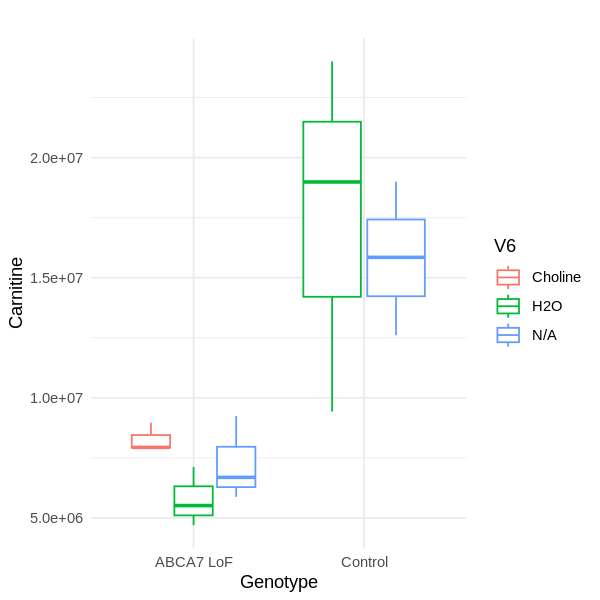

In [305]:
ggplot(T, aes(x = V5, y = Carnitine, col = V6)) +
  geom_boxplot(outlier.shape = 1) +
  labs(x = "Genotype", y = "Carnitine", title = "") +
  theme_minimal() #+ ylim(c(0,1.5e+13))
dev.off()


null device 
          1

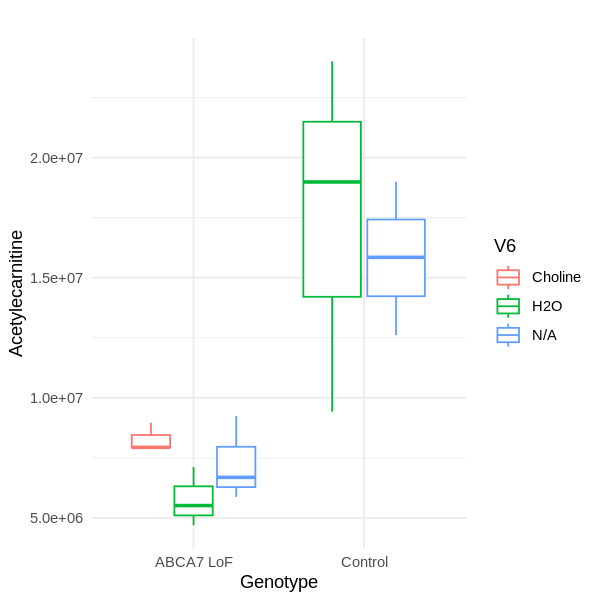

In [306]:
ggplot(T, aes(x = V5, y = Carnitine, col = V6)) +
  geom_boxplot(outlier.shape = 1) +
  labs(x = "Genotype", y = "Acetylecarnitine", title = "") +
  theme_minimal() #+ ylim(c(0,1.5e+13))
dev.off()


### projection

In [124]:
allcompounds = read.csv('../processed_data/metabolomics_iN/AllCompounds.csv', sep = "", check.names=FALSE)
meta = read.csv('../processed_data/metabolomics_iN/meta.csv', header=FALSE)
meta$filename = paste0('Norm. Area: ', meta$V2, '.raw (', meta$V1, ')')
rownames(meta) = meta$filename
meta_temp = meta[meta$V6!='Choline',]
temp = allcompounds[,startsWith(names(allcompounds), 'Norm. Area')]
temp2 = temp[,meta_temp$filename]

png 
  2

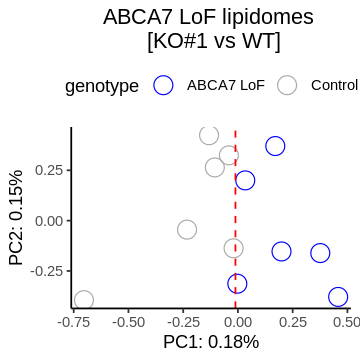

In [133]:
pca_res <- prcomp(na.omit(t(scale(t(temp2)))), scale. = FALSE)
temp = as.data.frame(pca_res$rotation)
temp$genotype = meta_temp$V5
temp$treat = meta_temp$V6

library(ggplot2)
pc1 = summary(pca_res)$importance['Proportion of Variance',]['PC1']
pc2 = summary(pca_res)$importance['Proportion of Variance',]['PC2']

p1 = ggplot(temp, aes(x=PC1, y=PC2)) +
  geom_point(aes(color=genotype), shape=21, size=5, stroke=.5) + theme_classic() + 
scale_color_manual(values = c('blue', 'darkgrey', 'red')) + xlab(paste0('PC1: ', round(pc1, 2), '%')) + ylab(paste0('PC2: ', round(pc2, 2), '%'))+ theme(legend.position="top") + ggtitle('ABCA7 LoF lipidomes \n [KO#1 vs WT]')+theme(plot.title = element_text(size = 13,  hjust=.5)) +
geom_vline(xintercept = median(temp$PC1), linetype = "dashed", color = "red")
# + geom_vline(x==0)

options(repr.plot.width=3, repr.plot.height=3)

pdf('../pdf_figures/metab_pca.pdf', width=3, height=3)
p1
dev.off()

p1

In [88]:
# understand the p-value
# metabolomics separation p-value
1/choose(12,6)

[1] 0.001082251

In [87]:
# lipidomics separation p-value
(1-(1/choose(12,6)))*(1/choose(12,6))*2

[1] 0.00216216

### comparison of lipidomics and metabolomics

In [76]:
allcompounds = read.csv('../processed_data/metabolomics_iN/AllCompounds.csv', sep = "", check.names=FALSE)
meta = read.csv('../processed_data/metabolomics_iN/meta.csv', header=FALSE)
meta$filename = paste0('Norm. Area: ', meta$V2, '.raw (', meta$V1, ')')
rownames(meta) = meta$filename
meta_temp = meta#[meta$V6!='Choline',]
allcompounds = allcompounds[ (allcompounds$Background=='False') & (allcompounds$Tags%in%c('Level 1 ID', 'Level 2 ID', 'MasslistRT ID')),]

temp = allcompounds[,startsWith(names(allcompounds), 'Norm. Area')]
temp2 = temp[,meta_temp$filename]

In [77]:
library(SingleCellExperiment)
library(ggplot2)
library(ggpubr)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

In [78]:
# load the iN lipidomics data
data = readRDS('../../ABCA7lof//processed_data/for_plotting/lipidomics.rds')
d = data$ngn2_all
cts = assays(d)$counts
class = rowData(d)$lipid.class
cts$class = class

# sum by lipid class
result <- aggregate(. ~ class, data = cts[cts$class %in% unique(class), ], sum)
rownames(result) = result$class
result$class = NULL
df =  as.data.frame(t(result))
total = rowSums(df)
df = cbind(df, total)
rownames(df) = colData(d)$Label
df = df[meta_temp$V3,]

In [79]:
df_T = df
df_T$genotype = meta_temp$V5
df_T$treat = meta_temp$V6

In [80]:
out = list()
x = 1
names = c('Carnitine', 'Acetylcarnitine', 'Propionylcarnitine')
for (i in names){
    T = t(unname(temp2[allcompounds$Name==i,]))
    colnames(T) = 'compound'

    df2 = cbind(df_T, T)
    df2$grp = meta_temp$V5

    # Assuming df2 and ggplot2 have been loaded
    model <- lm(compound ~ TG, data = df2[df2$treat != 'Choline',])
    # Extracting coefficients
    intercept <- coef(model)[1]
    slope <- coef(model)[2]

    # Create an equation string
    equation <- sprintf("y = %.2ex + %.2e", slope, intercept)

    p1 = ggplot(df2[df2$treat!='Choline',], aes(x=TG, y=compound)) + geom_smooth(method = "lm",
    se = TRUE, col = "grey", fill='grey', alpha=.1)+ geom_point(aes(color=grp), shape=20, size=5, stroke=.5) + ylab(i) + theme_classic() + 
    scale_color_manual(values = c('blue', 'darkgrey', 'red'))+theme(legend.position = "none")+#+ ylim(c(0,2.5e+07))+
      annotate("text", x = Inf, y = Inf, label = equation, hjust = 1.1, vjust = 2, size = 5, color = "black")
    out[[x]] = p1
    x = x+1
}

In [100]:
out2 = list()
x = 1
names = c('Carnitine', 'Acetylcarnitine', 'Propionylcarnitine')
for (i in names){
    T = t(unname(temp2[allcompounds$Name==i,]))
    colnames(T) = 'compound'

    df2 = cbind(df_T, T)
    df2$grp = meta_temp$V5

    # Assuming df2 and ggplot2 have been loaded
    model <- lm(compound ~ MG, data = df2[df2$treat != 'Choline',])
    # Extracting coefficients
    intercept <- coef(model)[1]
    slope <- coef(model)[2]

    # Create an equation string
    equation <- sprintf("y = %.2ex + %.2e", slope, intercept)

    p1 = ggplot(df2[df2$treat!='Choline',], aes(x=MG, y=compound, color=grp)) + geom_smooth(method = "lm",
    se = TRUE, col = "grey", alpha=.1, aes(col=grp))+ geom_point(aes(color=grp), shape=20, size=5, stroke=.5) + ylab(i) + theme_classic() + 
    scale_color_manual(values = c('blue', 'darkgrey', 'red'))+theme(legend.position = "none")+#+ ylim(c(0,2.5e+07))+
      annotate("text", x = Inf, y = Inf, label = equation, hjust = 1.1, vjust = 2, size = 5, color = "black")
    out2[[x]] = p1
    x = x+1
}

`geom_smooth()` using formula = 'y ~ x'


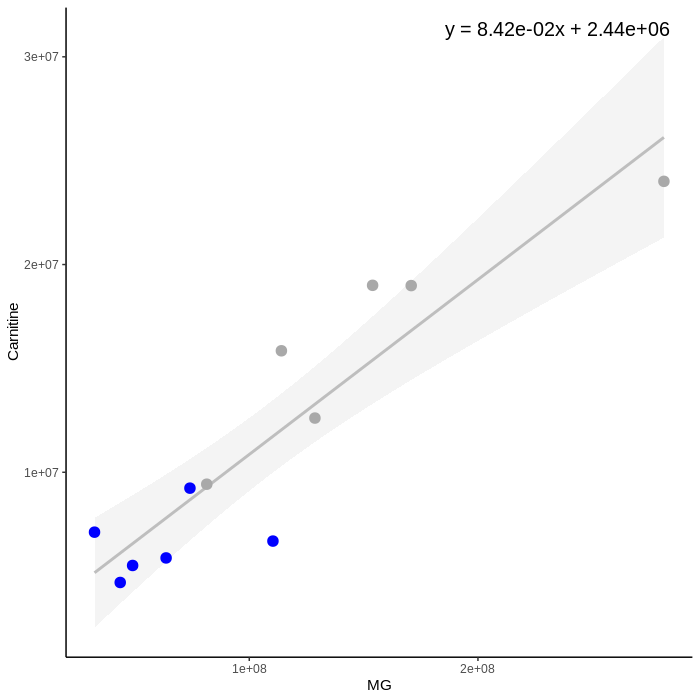

In [101]:
out2[[1]]

In [163]:
options(repr.plot.width=8, repr.plot.height=10)

pdf('../pdf_figures/metab_lipid_corr.pdf', width=8, height=10)
grid.arrange(out[[1]], out2[[1]], out[[2]], out2[[2]], out[[3]], out2[[3]], ncol = 2)
dev.off()

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



png 
  2

### plot specific metab species

In [6]:
library(reshape2)
allcompounds = read.csv('../processed_data/metabolomics_iN/AllCompounds.csv', sep = "", check.names=FALSE)
total = colSums(allcompounds[,startsWith(names(allcompounds), 'Norm. Area')])
meta = read.csv('../processed_data/metabolomics_iN/meta.csv', header=FALSE)
meta$filename = paste0('Norm. Area: ', meta$V2, '.raw (', meta$V1, ')')
rownames(meta) = meta$filename
meta_temp = meta[meta$V6!='Choline',]
allcompounds = allcompounds[ (allcompounds$Background=='False') & (allcompounds$Tags%in%c('Level 1 ID', 'Level 2 ID', 'MasslistRT ID')),]

temp = allcompounds[,startsWith(names(allcompounds), 'Norm. Area')]
temp = as.data.frame(t(temp))
temp2 = temp[meta_temp$filename,]

colnames(temp2) = allcompounds$Name
temp2$grp = as.character(meta_temp$V5)

In [7]:
temp2$ratio = temp2$Acetylcarnitine/temp2$Carnitine
T = melt(temp2)
head(T)

Using grp as id variables



,grp,variable,value
,<chr>,<fct>,<dbl>
1,Control,Propionylcarnitine,5592370.1
2,Control,Propionylcarnitine,4762824.3
3,Control,Propionylcarnitine,6592255.4
4,ABCA7 LoF,Propionylcarnitine,180632.1
5,ABCA7 LoF,Propionylcarnitine,440729.5
6,ABCA7 LoF,Propionylcarnitine,877965.0


In [8]:
names = c('Carnitine', 'Acetylcarnitine', 'Propionylcarnitine', 'ratio')

T = T[as.character(T$variable)%in%names,]


In [10]:
log2(mean(T$value[(T$grp=='ABCA7 LoF') & (T$variable=='Acetylcarnitine')])/mean(T$value[(T$grp=='Control') & (T$variable=='Acetylcarnitine')]))

[1] -1.318686

In [11]:
log2(mean(T$value[(T$grp=='ABCA7 LoF') & (T$variable=='Carnitine')])/mean(T$value[(T$grp=='Control') & (T$variable=='Carnitine')]))

[1] -1.352054

In [12]:
log2(mean(T$value[(T$grp=='ABCA7 LoF') & (T$variable=='Propionylcarnitine')])/mean(T$value[(T$grp=='Control') & (T$variable=='Propionylcarnitine')]))

[1] -3.545656

In [15]:
library(ggplot2)
library(ggsignif)

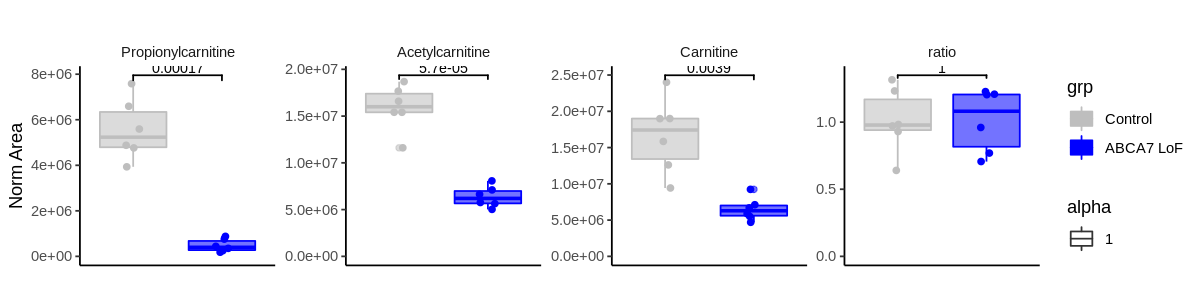

In [17]:
options(repr.plot.width = 10, repr.plot.height = 2.5)

cols = c('grey', 'blue')
names(cols) = c('Control', 'ABCA7 LoF')
T$grp = factor(T$grp, levels=c('Control', 'ABCA7 LoF'))

#pdf('../pdf_figures/metab_species.pdf',width=6, height = 2.5)

ggplot(T, aes(x = grp, y = (value))) +
  geom_boxplot(aes(color=grp, fill=grp, alpha=1)) +
  labs(x = "", y = "Norm Area", title = "") +
  theme_classic() + geom_jitter(aes(color=grp), width=.1) + geom_signif(comparisons = list(c("Control", "ABCA7 LoF")), textsize = 3, test = "t.test", map_signif_level = F) + scale_fill_manual(values = cols)  + scale_color_manual(values = cols) + facet_wrap(~variable, nrow=1, scales = "free") +   theme(
    axis.text.x = element_blank(),  # Remove x-axis labels
    axis.ticks.x = element_blank() , strip.background = element_rect(fill = "white", color = NA)) + scale_y_continuous(limits = c(0, NA))

#dev.off()
# Remove x-axis ticks
#+ ylim(c(0,1.5e+13))